## Final Project Submission

Please fill out:
* Student name: Sean Fry  
* Student pace: self paced
* Scheduled project review date/time: 1/24
* Instructor name: Claude Fried
* Blog post URL:


# Movie Genre, Gross Earnings, and Rating Analysis

## Overview
This project analyzes multiple movie databases to determine success rates for different characteristics of movies. For this analysis a movie is considered a success if it makes twice as much gross as what the production budget was. In this analysis the three main categories that will be looked at are movie release month, movie genre, and movie production budget. This data can be used by a movie studio to optimize the production of any movies they are making to maximize the chances of success.

## Business Problem
Microsoft should be able to better allocate resources when producing movies to maximize their chances of releasing successful movies based on this analysis. Doing so should reduce wasted resources on unsuccessful movies as well as increase the perception of the studio as more movies are released that are successful.

## Data Understanding
imdb and Box Office Mojo have data on thousands of movies, separated by titles or an ID specific to each movie. The data files provide information on the years the movies were made, the genres, runtime, rating, and gross earnings.

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
basics = pd.read_csv('./zippedData/imdb.title.basics.csv.gz')
ratings = pd.read_csv('./zippedData/imdb.title.ratings.csv.gz')
movies = pd.read_csv('./zippedData/tmdb.movies.csv.gz')
gross = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [5]:
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [6]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [7]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


### Gross Data
This data contains the domestic and foreign gross earnings for movies separated by titles.

In [8]:
gross.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Movie Basic Info
This data contains the title, year made, runtime, and genres of the movies. The movies are listed by an internal ID number

In [9]:
basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


### Ratings Data
This data contains the number of ratings and the average rating. The movies are separated by an internal ID number.

In [10]:
ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


### Data Preparation
I'm taking each data set and normalizing column names and dropping extra columns. For the gross table, I need to make a total gross column and make sure it is a numeric value.

In [11]:
#Change money values to int instead of string
gross[gross.columns[3:]] = gross[gross.columns[3:]].replace('[\$,]', '', regex=True).astype('int64')

In [12]:
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [13]:
gross['profit'] = gross['worldwide_gross']-gross['production_budget']

In [14]:
gross['profit_ratio'] = gross['profit']/gross['production_budget']

In [15]:
gross.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_ratio
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,5.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-0.572108
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696


In [16]:
def movie_success(ratio):
    '''
    This will define how successful a movie is based on how much money it makes in relation to 
    how much money it cost to produce the movie
    '''
    if (ratio) >=2:
        return True
    else:
        return False

In [17]:
gross['success'] = gross['profit_ratio'].apply(movie_success)

In [18]:
gross.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_ratio,success
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,5.532577,True
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673,False
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-0.572108,False
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841,True
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696,True


Cleaning up the genres of the basics column so that each movie will show in each genre it is in during analysis.

In [19]:
basics['genres'] = basics['genres'].apply(lambda x: str(x).replace(',', ' '))

In [20]:
basics['genres'] = basics['genres'].apply(lambda x: x.split())

In [21]:
basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"[Comedy, Drama, Fantasy]"


In [22]:
movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [23]:
#Changing date to date-time format
movies['release_date'] = pd.to_datetime(movies['release_date'])

In [24]:
#Extracting the month from the movies dataframe into a new column
movies['release_month'] = movies['release_date'].apply(lambda x: str(x.month))

In [25]:
## Changes the primary_title column to just title so we can join with the gross table more easily.
basics = basics.rename(columns={'primary_title': 'title'})

In [26]:
## Changes the movie column to title so we can join with the basics table more easily.
gross = gross.rename(columns={'movie': 'title'})

In [27]:
## Dropping columns that are not relevant to what I am looking for.
basics.drop(columns = ['original_title', 'start_year'], inplace=True)
gross.drop(columns = ['release_date', 'domestic_gross', 'id'], inplace=True)
movies.drop(columns = ['Unnamed: 0', 
                       'genre_ids', 'id', 
                       'original_language', 'original_title',
                       'popularity', 'vote_average', 'vote_count'], 
            inplace=True)

### Merging Data Sets
I'll be merging all of the data into one table, keeping titles, genres, rating, and gross income. When I'm done I'll filter out any movies with less than 100 reviews.

In [28]:
#merging the imdb tables together first
basics_and_ratings = pd.merge(basics, ratings, on=['tconst'], how='inner')
basics_and_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   title            73856 non-null  object 
 2   runtime_minutes  66236 non-null  float64
 3   genres           73856 non-null  object 
 4   averagerating    73856 non-null  float64
 5   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 3.9+ MB


In [29]:
# Keeping the duplicate rows witht the highest review numbers.
basics_and_ratings.sort_values(by=['title', 'numvotes'], inplace=True)

In [30]:
basics_and_ratings = basics_and_ratings.drop_duplicates(subset=['title'])

In [31]:
basics_and_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69993 entries, 7706 to 45325
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           69993 non-null  object 
 1   title            69993 non-null  object 
 2   runtime_minutes  62563 non-null  float64
 3   genres           69993 non-null  object 
 4   averagerating    69993 non-null  float64
 5   numvotes         69993 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 3.7+ MB


In [32]:
#merging the combined gross and release table
date_and_gross = pd.merge(gross, movies, on=['title'], how='inner')

In [33]:
date_and_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2385 entries, 0 to 2384
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              2385 non-null   object        
 1   production_budget  2385 non-null   int64         
 2   worldwide_gross    2385 non-null   int64         
 3   profit             2385 non-null   int64         
 4   profit_ratio       2385 non-null   float64       
 5   success            2385 non-null   bool          
 6   release_date       2385 non-null   datetime64[ns]
 7   release_month      2385 non-null   object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 151.4+ KB


In [34]:
data = pd.merge(date_and_gross, basics_and_ratings, on=['title'], how='inner')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2226 entries, 0 to 2225
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              2226 non-null   object        
 1   production_budget  2226 non-null   int64         
 2   worldwide_gross    2226 non-null   int64         
 3   profit             2226 non-null   int64         
 4   profit_ratio       2226 non-null   float64       
 5   success            2226 non-null   bool          
 6   release_date       2226 non-null   datetime64[ns]
 7   release_month      2226 non-null   object        
 8   tconst             2226 non-null   object        
 9   runtime_minutes    2170 non-null   float64       
 10  genres             2226 non-null   object        
 11  averagerating      2226 non-null   float64       
 12  numvotes           2226 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64(3), int64(4), object(4)


In [36]:
data.head()

,title,production_budget,worldwide_gross,profit,profit_ratio,success,release_date,release_month,tconst,runtime_minutes,genres,averagerating,numvotes
0,Avatar,425000000,2776345279,2351345279,5.532577,True,2009-12-18,12,tt1775309,93.0,[Horror],6.1,43
1,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,635063875,1.546673,False,2011-05-20,5,tt1298650,136.0,"[Action, Adventure, Fantasy]",6.6,447624
2,Avengers: Age of Ultron,330600000,1403013963,1072413963,3.243841,True,2015-05-01,5,tt2395427,141.0,"[Action, Adventure, Sci-Fi]",7.3,665594
3,Avengers: Infinity War,300000000,2048134200,1748134200,5.827114,True,2018-04-27,4,tt4154756,149.0,"[Action, Adventure, Sci-Fi]",8.5,670926
4,Justice League,300000000,655945209,355945209,1.186484,False,2017-11-17,11,tt0974015,120.0,"[Action, Adventure, Fantasy]",6.5,329135


In [37]:
data.drop(columns=['release_date', 'tconst', 'numvotes', 'runtime_minutes'], inplace=True)

In [38]:
#dropping duplicate titles, keeping earlier release month
data.sort_values(by=['title', 'release_month'], inplace=True)

In [39]:
data = data.drop_duplicates(subset=['title'])

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 1995 to 344
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1779 non-null   object 
 1   production_budget  1779 non-null   int64  
 2   worldwide_gross    1779 non-null   int64  
 3   profit             1779 non-null   int64  
 4   profit_ratio       1779 non-null   float64
 5   success            1779 non-null   bool   
 6   release_month      1779 non-null   object 
 7   genres             1779 non-null   object 
 8   averagerating      1779 non-null   float64
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 126.8+ KB


In [41]:
#Separating into each genre
genre_data = data.explode('genres')

In [42]:
genre_data.head()

,title,production_budget,worldwide_gross,profit,profit_ratio,success,release_month,genres,averagerating
1995,#Horror,1500000,0,-1500000,-1.000000,False,11,Crime,3.0
1995,#Horror,1500000,0,-1500000,-1.000000,False,11,Drama,3.0
1995,#Horror,1500000,0,-1500000,-1.000000,False,11,Horror,3.0
1672,10 Cloverfield Lane,5000000,108286422,103286422,20.657284,True,3,Drama,7.2
1672,10 Cloverfield Lane,5000000,108286422,103286422,20.657284,True,3,Horror,7.2


In [43]:
data.to_csv('./zippedData/clean_data.csv')

## Analysis
We are going to look at three things. 
1.)Average earnings by release month. This will be a bar graph grouping movies by release month
    and averaging their earnings.
2.)Average earnings by genre. Same as above, but with genre as the x groupings.
3.)Average earnings by runtime. Line graph(?) average earnings by runtime. Make a function to find $/min

In [44]:
data['release_month'] = data['release_month'].apply(lambda x: int(x))

### Release Month

Looking to see if there are any trends for how much money is made on a movie depending on what time of year it is released.

In [45]:
#aggregating money data by release month
month_money = data[['release_month', 'success']].groupby('release_month').agg(['count', 'mean']).sort_values(by='release_month')

In [46]:
month_money.columns = month_money.columns.get_level_values(1)
month_money

,count,mean
release_month,,
1,151,0.317881
2,117,0.350427
3,161,0.254658
4,145,0.282759
5,121,0.347107
6,141,0.354610
7,127,0.448819
8,143,0.279720
9,145,0.289655


In [47]:
#Changing the decimal mean to a percent value. 
month_money['percent_success'] = month_money['mean']*100

In [48]:
months = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
for i in range(len(month_money)):
    month_money.loc[i, 'month'] = months[i-1]
month_money

,count,mean,percent_success,month
release_month,,,,
1,151.0,0.317881,31.788079,Jan
2,117.0,0.350427,35.042735,Feb
3,161.0,0.254658,25.465839,March
4,145.0,0.282759,28.275862,April
5,121.0,0.347107,34.710744,May
6,141.0,0.354610,35.460993,June
7,127.0,0.448819,44.881890,July
8,143.0,0.279720,27.972028,Aug
9,145.0,0.289655,28.965517,Sept


In [49]:
for i in range(len(month_money)):
    month_money.loc[i, 'month'] = months[i-1]
month_money

,count,mean,percent_success,month
release_month,,,,
1,151.0,0.317881,31.788079,Jan
2,117.0,0.350427,35.042735,Feb
3,161.0,0.254658,25.465839,March
4,145.0,0.282759,28.275862,April
5,121.0,0.347107,34.710744,May
6,141.0,0.354610,35.460993,June
7,127.0,0.448819,44.881890,July
8,143.0,0.279720,27.972028,Aug
9,145.0,0.289655,28.965517,Sept


In [50]:
#drop extra row that showed up while putting months in dataframe
month_money = month_money.drop(0)


In [51]:
#sorting by different values
month_count = month_money.sort_values(by='count')
month_success = month_money.sort_values(by='percent_success')

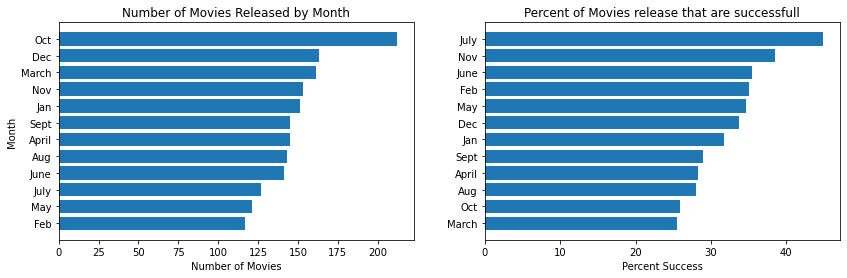

In [52]:
fig, axes = plt.subplots(figsize=(14,4), ncols=2)

x1 = month_count['month']
x2 = month_success['month']

y1 = month_count['count']
y2 = month_success['percent_success']

axes[0].barh(x1,y1)
axes[0].set_title('Number of Movies Released by Month')
axes[0].set_xlabel('Number of Movies')
axes[0].set_ylabel('Month')

axes[1].barh(x2, y2)
axes[1].set_title('Percent of Movies release that are successfull')
axes[1].set_xlabel('Percent Success')

plt.savefig("./images/release_date_gross_data.png", dpi=150)
plt.show();

### Genre Data
Looking to find trends on gross income based on genre.

In [53]:
#Grouping by genre
genre_money = genre_data[['genres', 'success']].groupby('genres').agg(['count', 'mean']).sort_values(by='genres')
genre_money

success          
              count      mean
genres                       
Action          443  0.329571
Adventure       332  0.424699
Animation       100  0.470000
Biography       131  0.335878
Comedy          551  0.353902
Crime           253  0.205534
Documentary     103  0.252427
Drama           865  0.283237
Family           97  0.278351
Fantasy         121  0.330579
History          52  0.288462
Horror          234  0.376068
Music            47  0.340426
Musical          11  0.363636
Mystery         131  0.412214
News              3  0.333333
Romance         211  0.369668
Sci-Fi          143  0.398601
Sport            40  0.150000
Thriller        294  0.319728
War              20  0.150000
Western          12  0.166667
nan               7  0.571429

In [54]:
#Dropping Rows with low numbers of responses
genre_money.drop(genre_money.loc[genre_money['success']['count']<=20].index, inplace=True)
genre_money

success          
              count      mean
genres                       
Action          443  0.329571
Adventure       332  0.424699
Animation       100  0.470000
Biography       131  0.335878
Comedy          551  0.353902
Crime           253  0.205534
Documentary     103  0.252427
Drama           865  0.283237
Family           97  0.278351
Fantasy         121  0.330579
History          52  0.288462
Horror          234  0.376068
Music            47  0.340426
Mystery         131  0.412214
Romance         211  0.369668
Sci-Fi          143  0.398601
Sport            40  0.150000
Thriller        294  0.319728

In [55]:
#Flattening table to more easily rearrange data.
genre_money.columns = genre_money.columns.get_level_values(1)

In [56]:
genre_money['percent_success'] = genre_money['mean']*100
genre_money.head()

,count,mean,percent_success
genres,,,
Action,443,0.329571,32.957111
Adventure,332,0.424699,42.469880
Animation,100,0.470000,47.000000
Biography,131,0.335878,33.587786
Comedy,551,0.353902,35.390200


In [57]:
#Sorting by each column
genre_count = genre_money.sort_values(by='count')
genre_success = genre_money.sort_values(by='percent_success')

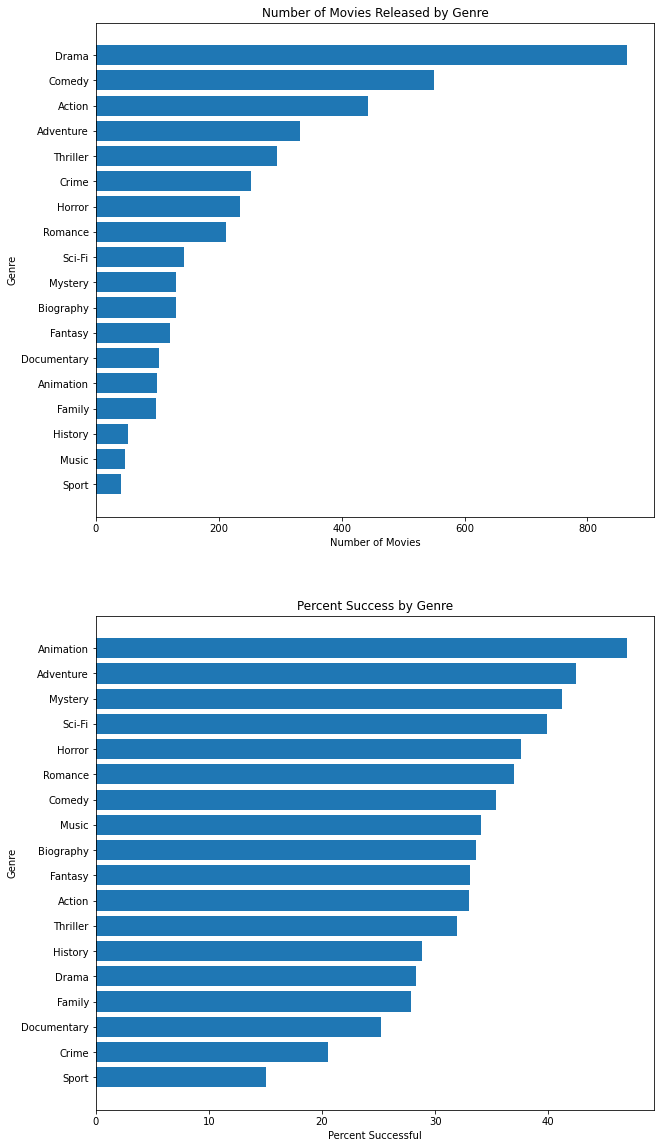

In [58]:
fig, axes = plt.subplots(figsize=(10,20), nrows=2)

x1 = genre_count.index
x2 = genre_success.index

y1 = genre_count['count']
y2 = genre_success['percent_success']

axes[0].barh(x1,y1)
axes[0].set_title('Number of Movies Released by Genre')
axes[0].set_xlabel('Number of Movies')
axes[0].set_ylabel('Genre')

axes[1].barh(x2,y2)
axes[1].set_title('Percent Success by Genre')
axes[1].set_xlabel('Percent Successful')
axes[1].set_ylabel('Genre')

plt.savefig("./images/genre_gross_data.png", dpi=350)
plt.show();

### Production Budget 
Looking at the data to see if there are any trends in how many movies are successful based on production budget.

Production budget as x-axis, success as qualifier.

In [59]:
data['production_budget'].describe()

count    1.779000e+03
mean     3.939621e+07
std      5.300111e+07
min      9.000000e+03
25%      5.000000e+06
50%      2.000000e+07
75%      5.000000e+07
max      4.250000e+08
Name: production_budget, dtype: float64

In [60]:
prod_success = data[data['success'] == True]
prod_failure = data[data['success'] == False]

In [61]:
ticks = []
x_label = 5000000

for i in range(0,10):
    ticks.append(x_label)
    x_label += 5000000

In [62]:
ticks

[5000000,
 10000000,
 15000000,
 20000000,
 25000000,
 30000000,
 35000000,
 40000000,
 45000000,
 50000000]

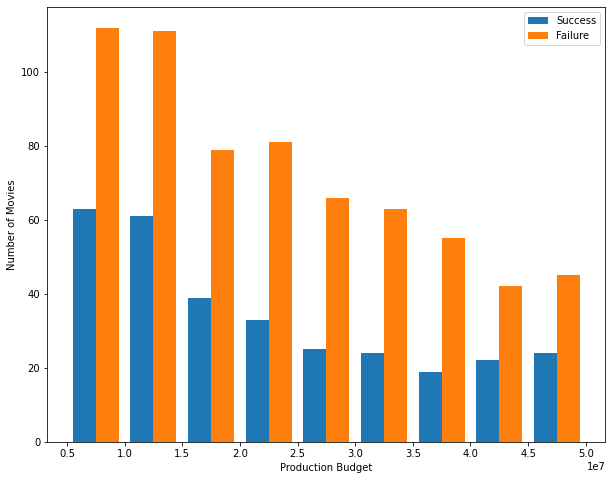

In [63]:
fig, ax = plt.subplots(figsize=(10,8))

success = prod_success['production_budget']
failure = prod_failure['production_budget']

ax.hist([success, failure], bins = ticks, range=(5000000, 50000000), label=['Success', 'Failure'])
ax.legend(loc='upper right')
ax.set_ylabel('Number of Movies')
ax.set_xlabel('Production Budget')
ax.set_xticks(ticks);

plt.savefig("./images/production_budget.png", dpi=350)
plt.show();

## Conclusions

From my data I have decided on three recommendations for Microsoft on how to go about releasing their movies.
* **Release Month**: The highest number of movies are released in October and December, the highest percent success is in July, November and June. Summer movies seem to be more successful and have less competition from other releases.
* **Genre**: Drama is a very crowded and competitve genre, while animation has a higher rate of success and a smaller pool of competition. Comedy, Action, and Adventure movies are also worth looking into.
* **Production Budget**: Looking at the graph of production budget makes me think either extreme of the cost spectrum is more beneficial. Either high or low budget movies produce higher success rates.

## Next Steps
If I had more time to work with this data, here are some other ideas I would like to explore that could improve production efforts at microsoft.
* **Further breakdown of budget**: Getting actual percentages for the production budget as well as the histogram could be valuable
* **Looking at directors**: Looking at which directors have the higheest success rates would be valuable in knowing who to hire for the movies.
* **Looking at lead actors**: We could have looked at the success rate based on actors and numbers of movies the actors have been in.